In [1]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import pandas as pd
import numpy as np

from pandas import DataFrame
import xgboost as xgb
import os

In [3]:
data=pd.read_excel('Student Applications & Performance.xlsx',header=0)
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [4]:
data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [5]:
data.shape

(3400, 56)

In [6]:
data.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [7]:
# replacing the missing values with median
data['STDNT_TEST_ENTRANCE_COMB'].fillna(990, inplace=True)

In [8]:
ind1=data[data['STDNT_TEST_ENTRANCE_COMB'].isnull()].index

In [9]:
#removing these coloumns as we have the combined score
data=data.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2'],axis=1)

In [10]:
#replacing with median
data['HIGH_SCHL_GPA'].fillna(3.2, inplace=True)

In [11]:
data['DISTANCE_FROM_HOME'].fillna(69, inplace=True)

In [12]:
data['FATHER_HI_EDU_CD'].fillna(4, inplace=True)

In [13]:
data.loc[(data.FATHER_HI_EDU_DESC == 'No Information'),'FATHER_HI_EDU_DESC']='Other/Unknown'

In [14]:
data.loc[(data.MOTHER_HI_EDU_DESC == 'No Information'),'MOTHER_HI_EDU_DESC']='Other/Unknown'

In [15]:
data['MOTHER_HI_EDU_CD'].fillna(4, inplace=True)

In [16]:
data['SECOND_TERM_ATTEMPT_HRS'].fillna(14, inplace=True)

In [17]:
data['SECOND_TERM_EARNED_HRS'].fillna(13, inplace=True)

In [18]:
bool_series=pd.isnull(data['CORE_COURSE_GRADE_1_S'])

In [19]:
ind11=data[bool_series]['CORE_COURSE_NAME_1_S'].dropna().index

In [20]:
data.loc[ind11,'CORE_COURSE_GRADE_1_S']='C'

In [21]:
data=data.drop([data.index[245]],axis=0)

In [22]:
data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE_COMB       0
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2754
CORE_COURSE_GRADE_5_F       2754
CORE_COURSE_NAME_6_F        3271
CORE_COURSE_GRADE_6_F       3271
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        157
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1037
CORE_COURSE_GRADE_3_S       1037
CORE_COURSE_NAME_4_S        2044
CORE_COURS

In [23]:
Cols=['CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F',
     'CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S',
     'CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S']

In [24]:
data[Cols]=data[Cols].fillna('Not picked')

In [25]:
Col1=['CORE_COURSE_GRADE_2_F', 
       'CORE_COURSE_GRADE_3_F',
       'CORE_COURSE_GRADE_4_F', 
       'CORE_COURSE_GRADE_5_F', 
       'CORE_COURSE_GRADE_6_F', 
       'CORE_COURSE_GRADE_1_S', 
       'CORE_COURSE_GRADE_2_S', 
       'CORE_COURSE_GRADE_3_S', 
       'CORE_COURSE_GRADE_4_S', 
       'CORE_COURSE_GRADE_5_S', 
       'CORE_COURSE_GRADE_6_S']

In [26]:
data[Col1]=data[Col1].fillna('NA')

In [27]:
data.isnull().sum()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
CORE_COURSE_NAME_4_F        0
CORE_COURSE_GRADE_4_F       0
CORE_COURSE_NAME_5_F        0
CORE_COURSE_GRADE_5_F       0
CORE_COURSE_NAME_6_F        0
CORE_COURSE_GRADE_6_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
CORE_COURSE_NAME_3_S        0
CORE_COURSE_GRADE_3_S       0
CORE_COURSE_NAME_4_S        0
CORE_COURSE_GRADE_4_S       0
CORE_COURSE_NAME_5_S        0
CORE_COURSE_GRADE_5_S       0
CORE_COURS

In [28]:
data1=data.copy()

In [29]:
#replacing 0 and 1 in both the data sets so that 1 indicates student leaving
data['RETURNED_2ND_YR']=data['RETURNED_2ND_YR'].replace({0:1,1:0})
data1['RETURNED_2ND_YR']=data1['RETURNED_2ND_YR'].replace({0:1,1:0})

In [30]:
# Converting GPA into categorical
data1['HIGH_SCHL_GPA'].describe()

count    3399.000000
mean        3.202696
std         0.451840
min         0.000000
25%         2.870000
50%         3.200000
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [31]:
def label (x):
    if x<=2.87:
        return 'Low'
    elif x<=3.2:
        return 'Med'
    else:
        return 'High'

In [32]:
data1['HIGH_SCHL_GPA']=data1['HIGH_SCHL_GPA'].map(label)

In [33]:
data1['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3399.000000
mean      996.498970
std       143.846038
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [34]:
#converting Entrance score in categorical
data1['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3399.000000
mean      996.498970
std       143.846038
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [35]:
def label1 (x):
    if x<=910:
        return 'Low'
    elif x<=990:
        return 'Med'
    else:
        return 'High'

In [36]:
data1['STDNT_TEST_ENTRANCE_COMB']=data1['STDNT_TEST_ENTRANCE_COMB'].map(label1)

In [37]:
data3=data.copy()

In [38]:
#Model Building
data3['HIGH_SCHL_GPA']=data3['HIGH_SCHL_GPA'].map(label)

In [39]:
data3['STDNT_TEST_ENTRANCE_COMB']=data3['STDNT_TEST_ENTRANCE_COMB'].map(label1)

In [40]:
#XGboost
X=data3.drop(['RETURNED_2ND_YR','STUDENT IDENTIFIER'],axis=1)
y=data3['RETURNED_2ND_YR']

In [41]:
X=pd.get_dummies(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [44]:
classifier=xgboost.XGBClassifier()

In [45]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [46]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=4,cv=5,verbose=3)

In [47]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.8min finished
C:\Users\prathik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.

In [48]:
'''RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                          n++,verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=3)'''


"RandomizedSearchCV(cv=5, error_score=nan,\n                   estimator=XGBClassifier(base_score=None, booster=None,\n                                           colsample_bylevel=None,\n                                           colsample_bynode=None,\n                                           colsample_bytree=None, gamma=None,\n                                           gpu_id=None, importance_type='gain',\n                                           interaction_constraints=None,\n                                           learning_rate=None,\n                                           max_delta_step=None, max_depth=None,\n                                           min_child_weight=None, missing=nan,\n                                           monotone_constraints=None,\n                                          n++,verbosity=None),\n                   iid='deprecated', n_iter=5, n_jobs=4,\n                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,\n                 

In [49]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [50]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [51]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)

In [52]:
clf.fit(X_train,y_train)

[14:58:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X_train,y_train,cv=10)

C:\Users\prathik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [54]:
score

array([0.82352941, 0.8487395 , 0.82352941, 0.84453782, 0.85714286,
       0.81932773, 0.81512605, 0.81932773, 0.82352941, 0.86919831])

In [55]:
score.mean()

0.8343988228202672

In [56]:
score=cross_val_score(clf,X_test,y_test,cv=10)

C:\Users\prathik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [57]:
score

array([0.85294118, 0.78431373, 0.75490196, 0.82352941, 0.82352941,
       0.85294118, 0.79411765, 0.87254902, 0.83333333, 0.80392157])

In [58]:
score.mean()

0.8196078431372549

In [59]:
data3['RETURNED_2ND_YR'].value_counts()

0    2676
1     723
Name: RETURNED_2ND_YR, dtype: int64

In [60]:
pred=clf.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [62]:
results = confusion_matrix(y_test, pred)

In [63]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[779  22]
 [152  67]]


In [64]:
print ('Accuracy Score :')
print(accuracy_score(y_test, pred))
print ('Report : ')
print (classification_report(y_test, pred))

Accuracy Score :
0.8294117647058824
Report : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       801
           1       0.75      0.31      0.44       219

    accuracy                           0.83      1020
   macro avg       0.79      0.64      0.67      1020
weighted avg       0.82      0.83      0.80      1020



In [65]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [66]:
#Top 10 features
imp_feat.sort_values(ascending=False).head(10)

CORE_COURSE_NAME_1_S_Not picked    0.131733
CORE_COURSE_GRADE_1_S_NA           0.038819
CORE_COURSE_GRADE_2_S_NA           0.026384
CORE_COURSE_GRADE_1_S_F            0.020830
CORE_COURSE_NAME_2_S_Not picked    0.018598
CORE_COURSE_GRADE_3_S_D            0.018360
CORE_COURSE_GRADE_1_S_C            0.016462
CORE_COURSE_GRADE_2_S_F            0.014381
CORE_COURSE_GRADE_5_S_NA           0.011207
CORE_COURSE_GRADE_1_S_A            0.011063
dtype: float32

In [67]:
#Observation: Students whose grades are low and/or when they don't opt enough subjects are more likely to attrite

In [68]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
clf1=GradientBoostingClassifier(n_estimators=80,random_state=200)

In [70]:
X=data1.drop(['RETURNED_2ND_YR','STUDENT IDENTIFIER'],axis=1)
y=data1['RETURNED_2ND_YR']

In [71]:
X=pd.get_dummies(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [73]:
clf1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
clf1.score(X_test,y_test)

0.8205882352941176

In [75]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators" : [ 60,80,100,120,140,160]   
}

In [76]:
mod=RandomizedSearchCV(clf1,param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
mod.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [77]:
mod.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
mod.best_params_

{'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.1}

In [79]:
clf1=GradientBoostingClassifier(n_estimators=80,max_depth=6,learning_rate=0.15,random_state=200)

In [80]:
clf1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
clf1.score(X_test,y_test)

0.8137254901960784

In [82]:
pred1=clf1.predict(X_test)

In [83]:
results = confusion_matrix(y_test, pred1)

In [84]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[763  38]
 [152  67]]


In [85]:
print ('Accuracy Score :')
print(accuracy_score(y_test, pred1))
print ('Report : ')
print (classification_report(y_test, pred1))

Accuracy Score :
0.8137254901960784
Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       801
           1       0.64      0.31      0.41       219

    accuracy                           0.81      1020
   macro avg       0.74      0.63      0.65      1020
weighted avg       0.79      0.81      0.79      1020



In [86]:
imp_feat1=pd.Series(clf1.feature_importances_,index=X.columns.tolist())

In [87]:
imp_feat1.sort_values(ascending=False).head(10)

CORE_COURSE_NAME_1_S_Not picked    0.110110
CORE_COURSE_GRADE_1_S_C            0.032799
CORE_COURSE_GRADE_1_S_NA           0.032519
SECOND_TERM_ATTEMPT_HRS            0.031967
SECOND_TERM_EARNED_HRS             0.031019
CORE_COURSE_GRADE_2_S_F            0.022234
DISTANCE_FROM_HOME                 0.020414
CORE_COURSE_GRADE_2_S_NA           0.018124
FIRST_TERM_EARNED_HRS              0.017882
CORE_COURSE_GRADE_2_S_D            0.016124
dtype: float64

In [88]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

C:\Users\prathik\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\prathik\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)


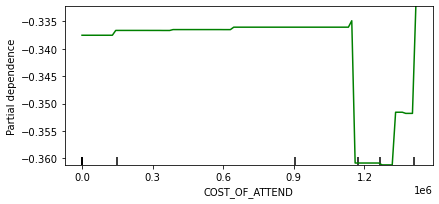

In [89]:
fig,axs=plot_partial_dependence(clf1, X, ['COST_OF_ATTEND'],feature_names=X.columns.tolist())

In [90]:
#Decision Tree

import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from numpy import nan
clf2=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.803921568627451

In [91]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.6260382284701203

In [92]:
import sklearn.model_selection as model_selection
mod=model_selection.GridSearchCV(clf2,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs'

In [93]:
GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs'

In [94]:
mod.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [95]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [96]:
clf2=tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8156862745098039

In [97]:
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.6553309504671672

In [98]:
import pydotplus
#os.environ["PATH"] += os.pathsep + 'C:\Users\prathik\anaconda3\Lib\site-packages\graphviz'

In [99]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [100]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [101]:
from IPython.display import Image

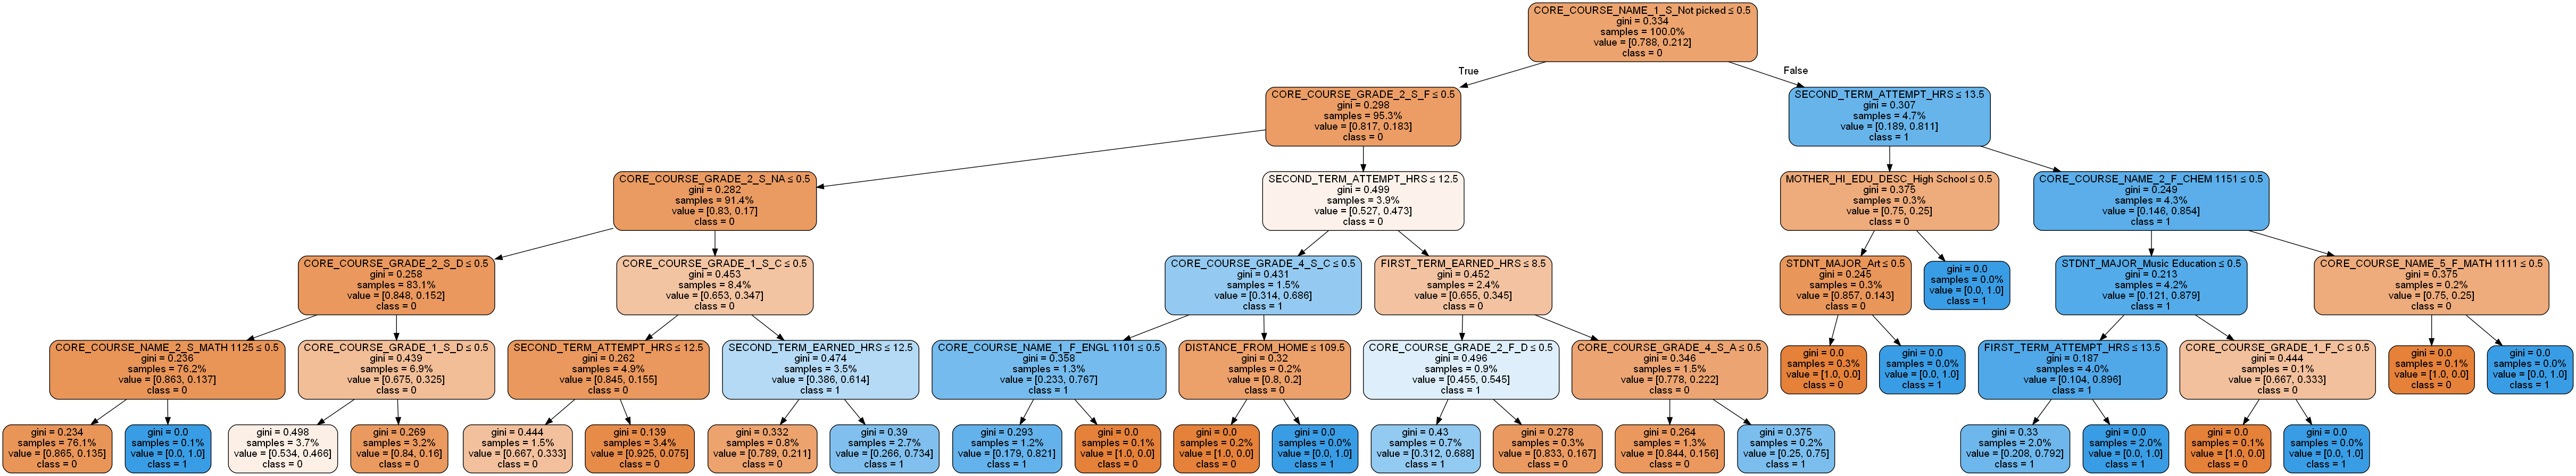

In [102]:
Image(graph.create_png())